In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
ruta = "/gdrive/MyDrive/EDEM/2024/Machine Learning - Regresion/NOTEBOOKS/Position_Salaries.csv"
dataset = pd.read_csv(ruta)
print(dataset.shape)
dataset.head()

(10, 3)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [8]:
# Extracting features (X) and target variable (y)
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [9]:
y.shape

(10,)

In [10]:
# Reshape y to a 2D array (required for StandardScaler)
y = y.reshape(-1, 1)

# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [20]:
# Fitting SVR to the dataset
regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())

SVR()

In [21]:
# Predicting a new result
# Note: You should scale the input value before predicting
# In this case, scale 6.5 using the same scalers used for training data
scaled_input = sc_X.transform([[6.5]])
y_pred_scaled = regressor.predict(scaled_input)

# Inverse transform to get the original scale
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

print("Predicted Salary for Level 6.5:", y_pred[0, 0])


Predicted Salary for Level 6.5: 170370.02040650236


<ipython-input-22-abe09048e5b5>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.


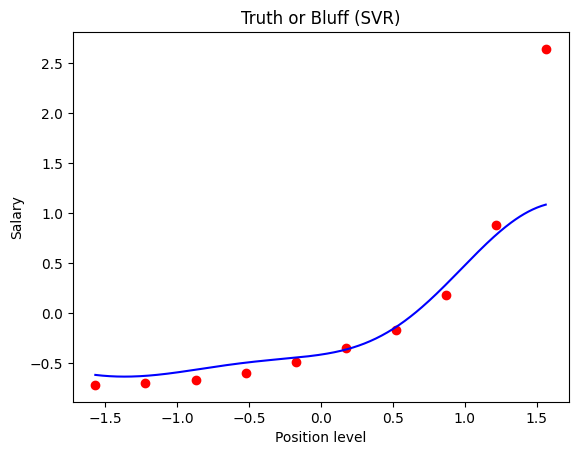

In [22]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()